In [1]:
import pandas as pd
train_fear_df = pd.read_csv("feartrainalldata.txt","\t")
test_fear_df = pd.read_csv("feartestalldata.txt","\t")

In [2]:
from konlpy.tag import Okt
okt_fear = Okt()
okt_fear.pos(u'전람회 나간다')

[('전람회', 'Noun'), ('나간다', 'Verb')]

In [3]:
def tokenize(doc):
    return ['/'.join(t) for t in okt_fear.pos(doc, norm=True, stem=True)]

In [4]:
train_fear_df.isnull().any()
train_fear_df['document'] = train_fear_df['document'].fillna('');
train_fear_df.isnull().any()
test_fear_df['document'] = test_fear_df['document'].fillna('');

In [5]:
train_fear_docs = [(tokenize(row[1]), row[2]) for row in train_fear_df.values]
test_fear_docs = [(tokenize(row[1]),row[2]) for row in test_fear_df.values]

In [6]:
print(train_fear_docs[0])
print(test_fear_docs[0])

(['언니/Noun', '동생/Noun', '으로/Josa', '부르다/Verb', '맞다/Verb', '일/Noun', '인가요/Josa', '..??/Punctuation'], 1)
(['톡/Noun', '크다/Verb', '언니/Noun', '들/Suffix', '임산부/Noun', '언니/Noun', '들/Suffix', 'ㅠㅠ/KoreanParticle'], 1)


In [7]:
tokens = [t for d in train_fear_docs for t in d[0]]
print("토큰개수:",len(tokens))

토큰개수: 259374


In [8]:
import nltk
fear_text = nltk.Text(tokens, name='NMSC')
print(len(fear_text.tokens))
print(len(set(fear_text.tokens)))
print(fear_text.vocab().most_common(10))

259374
20799
[('하다/Verb', 8087), ('이/Josa', 4939), ('./Punctuation', 4679), ('가/Josa', 3509), ('?/Punctuation', 3201), ('에/Josa', 3168), ('들/Suffix', 3097), ('../Punctuation', 2820), ('을/Josa', 2523), ('은/Josa', 2512)]


C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54616 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45796 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 44032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50640 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\sunho\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 46308 missing from c

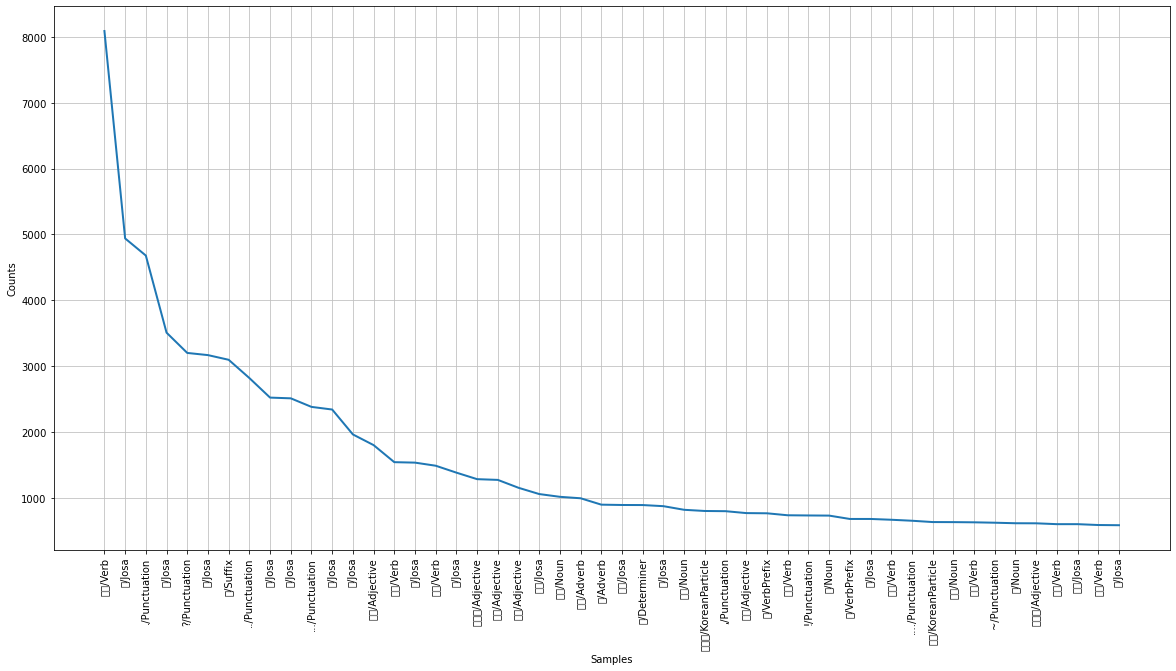

In [9]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.figure(figsize=(20,10))
fear_text.plot(50)

In [10]:
FEAR_FREQUENCY_COUNT = 1000;
fear_selected_words = [f[0] for f in fear_text.vocab().most_common(FEAR_FREQUENCY_COUNT)]

In [11]:
def fear_term_frequency(doc):
    return [doc.count(word) for word in fear_selected_words]

In [12]:
x_fear_train = [fear_term_frequency(d) for d,_ in train_fear_docs]
x_fear_test = [fear_term_frequency(d) for d,_ in test_fear_docs]
y_fear_train = [c for _,c in train_fear_docs]
y_fear_test = [c for _,c in test_fear_docs]

In [13]:
import numpy as np
x_fear_train = np.asarray(x_fear_train).astype('float32')
x_fear_test = np.asarray(x_fear_test). astype('float32')

y_fear_train = np.asarray(y_fear_train).astype('float32')
y_fear_test = np.asarray(y_fear_test).astype('float32')

In [14]:
import tensorflow as tf
fear_model= tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation = 'relu',input_shape=(FEAR_FREQUENCY_COUNT,)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [15]:
fear_model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
             loss=tf.keras.losses.binary_crossentropy,
             metrics=[tf.keras.metrics.binary_accuracy]
             )

In [16]:
fear_model.fit(x_fear_train, y_fear_train, epochs=50, batch_size=512)

Epoch 1/50
53/53 [==============================] - 0s 7ms/step - loss: 0.4410 - binary_accuracy: 0.8507
Epoch 2/50
53/53 [==============================] - 0s 5ms/step - loss: 0.3356 - binary_accuracy: 0.8640
Epoch 3/50
53/53 [==============================] - 0s 6ms/step - loss: 0.3034 - binary_accuracy: 0.8790
Epoch 4/50
53/53 [==============================] - 1s 11ms/step - loss: 0.2895 - binary_accuracy: 0.8862
Epoch 5/50
53/53 [==============================] - 0s 6ms/step - loss: 0.2801 - binary_accuracy: 0.8900
Epoch 6/50
53/53 [==============================] - 0s 7ms/step - loss: 0.2723 - binary_accuracy: 0.8919
Epoch 7/50
53/53 [==============================] - 0s 6ms/step - loss: 0.2652 - binary_accuracy: 0.8959
Epoch 8/50
53/53 [==============================] - 0s 6ms/step - loss: 0.2576 - binary_accuracy: 0.8996
Epoch 9/50
53/53 [==============================] - 0s 6ms/step - loss: 0.2491 - binary_accuracy: 0.9032
Epoch 10/50
53/53 [==============================] - 0

In [17]:
fear_results = fear_model.evaluate(x_fear_test, y_fear_test)

362/362 [==============================] - 1s 4ms/step - loss: 1.2218 - binary_accuracy: 0.8318


In [18]:
fear_results

[1.2218347787857056, 0.8318217396736145]

In [19]:
fear_model.save('fear_model.h5')

In [20]:
fear_review = "너무 무섭다"
fear_token = tokenize(fear_review)
fear_token

['너무/Adverb', '무섭다/Adjective']

In [21]:
tf = fear_term_frequency(fear_token)
data = np.expand_dims(np.asarray(tf).astype('float32'),axis=0)
float(fear_model.predict(data))

0.9999581575393677

In [22]:
def fear_predict(predict):
    fear_token = tokenize(predict)
    fear_tfq = fear_term_frequency(fear_token)
    fear_data = np.expand_dims(np.asarray(fear_tfq).astype('float32'), axis=0)
    fear_score = float(fear_model.predict(fear_data))
    if(fear_score > 0.5):
        print(f"{predict} ==> 공포 ({round(fear_score*100)}%)")
    else:
        print(f"{predict} ==> 공포X ({round((1-fear_score)*100)}%)")

In [23]:
fear_predict("김은지 얼굴")

김은지 얼굴 ==> 공포 (89%)


In [24]:
#놀람 감정 분석

In [25]:
import pandas as pd
train_surprise_df = pd.read_csv("surprisetrainalldata.txt","\t")
test_surprise_df = pd.read_csv("surprisetestalldata.txt","\t")

In [26]:
from konlpy.tag import Okt
okt_surprise = Okt()

In [27]:
def tokenize(doc):
    return ['/'.join(t) for t in okt_surprise.pos(doc, norm=True, stem=True)]

In [28]:
train_surprise_df.isnull().any()
train_surprise_df['document'] = train_surprise_df['document'].fillna('');
train_surprise_df.isnull().any()
test_surprise_df['document'] = test_surprise_df['document'].fillna('');

In [29]:
train_surprise_docs = [(tokenize(row[1]), row[2]) for row in train_surprise_df.values]
test_surprise_docs = [(tokenize(row[1]),row[2]) for row in test_surprise_df.values]

In [30]:
print(train_surprise_docs[0])
print(test_surprise_docs[0])

(['언니/Noun', '동생/Noun', '으로/Josa', '부르다/Verb', '맞다/Verb', '일/Noun', '인가요/Josa', '..??/Punctuation'], 0)
(['톡/Noun', '크다/Verb', '언니/Noun', '들/Suffix', '임산부/Noun', '언니/Noun', '들/Suffix', 'ㅠㅠ/KoreanParticle'], 0)


In [31]:
tokens = [t for d in train_surprise_docs for t in d[0]]
print("토큰개수:",len(tokens))

토큰개수: 259374


In [32]:
import nltk
surprise_text = nltk.Text(tokens, name='NMSC')
print(len(surprise_text.tokens))
print(len(set(surprise_text.tokens)))
print(surprise_text.vocab().most_common(10))

259374
20799
[('하다/Verb', 8087), ('이/Josa', 4939), ('./Punctuation', 4679), ('가/Josa', 3509), ('?/Punctuation', 3201), ('에/Josa', 3168), ('들/Suffix', 3097), ('../Punctuation', 2820), ('을/Josa', 2523), ('은/Josa', 2512)]


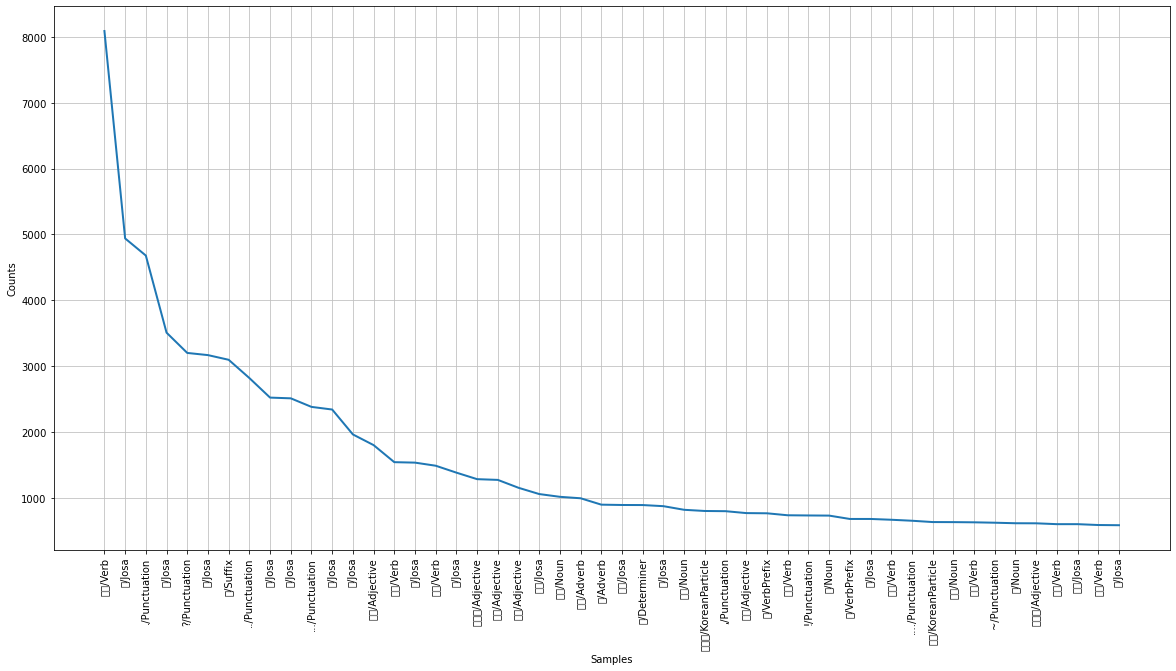

In [33]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.figure(figsize=(20,10))
surprise_text.plot(50)

In [34]:
SURPRISE_FREQUENCY_COUNT = 1000;
surprise_selected_words = [f[0] for f in surprise_text.vocab().most_common(SURPRISE_FREQUENCY_COUNT)]

In [35]:
def surprise_term_frequency(doc):
    return [doc.count(word) for word in surprise_selected_words]

In [36]:
x_surprise_train = [surprise_term_frequency(d) for d,_ in train_surprise_docs]
x_surprise_test = [surprise_term_frequency(d) for d,_ in test_surprise_docs]
y_surprise_train = [c for _,c in train_surprise_docs]
y_surprise_test = [c for _,c in test_surprise_docs]

In [37]:
import numpy as np
x_surprise_train = np.asarray(x_surprise_train).astype('float32')
x_surprise_test = np.asarray(x_surprise_test). astype('float32')

y_surprise_train = np.asarray(y_surprise_train).astype('float32')
y_surprise_test = np.asarray(y_surprise_test).astype('float32')

In [38]:
import tensorflow as tf
surprise_model= tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation = 'relu',input_shape=(SURPRISE_FREQUENCY_COUNT,)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [39]:
surprise_model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
             loss=tf.keras.losses.binary_crossentropy,
             metrics=[tf.keras.metrics.binary_accuracy]
             )

In [40]:
surprise_model.fit(x_surprise_train, y_surprise_train, epochs=50, batch_size=512)

Epoch 1/50
53/53 [==============================] - 0s 7ms/step - loss: 0.4357 - binary_accuracy: 0.8451
Epoch 2/50
53/53 [==============================] - 0s 7ms/step - loss: 0.3567 - binary_accuracy: 0.8505
Epoch 3/50
53/53 [==============================] - 0s 7ms/step - loss: 0.3308 - binary_accuracy: 0.8602
Epoch 4/50
53/53 [==============================] - 0s 7ms/step - loss: 0.3169 - binary_accuracy: 0.8675
Epoch 5/50
53/53 [==============================] - 0s 6ms/step - loss: 0.3063 - binary_accuracy: 0.8720
Epoch 6/50
53/53 [==============================] - 0s 5ms/step - loss: 0.2962 - binary_accuracy: 0.8768
Epoch 7/50
53/53 [==============================] - 0s 6ms/step - loss: 0.2863 - binary_accuracy: 0.8823
Epoch 8/50
53/53 [==============================] - 0s 6ms/step - loss: 0.2760 - binary_accuracy: 0.8866
Epoch 9/50
53/53 [==============================] - 0s 6ms/step - loss: 0.2651 - binary_accuracy: 0.8925
Epoch 10/50
53/53 [==============================] - 0s

In [41]:
surprise_results = surprise_model.evaluate(x_surprise_test, y_surprise_test)

362/362 [==============================] - 1s 2ms/step - loss: 1.6014 - binary_accuracy: 0.8283


In [42]:
surprise_results

[1.601439118385315, 0.8282802104949951]

In [43]:
surprise_model.save('surprise_model.h5')

In [44]:
surprise_review = "너무 놀랍다"
surprise_token = tokenize(surprise_review)
surprise_token

['너무/Adverb', '놀라다/Verb']

In [45]:
tf = surprise_term_frequency(surprise_token)
data = np.expand_dims(np.asarray(tf).astype('float32'),axis=0)
float(surprise_model.predict(data))

0.9997773766517639

In [46]:
def surprise_predict(predict):
    surprise_token = tokenize(predict)
    surprise_tfq = surprise_term_frequency(surprise_token)
    surprise_data = np.expand_dims(np.asarray(surprise_tfq).astype('float32'), axis=0)
    surprise_score = float(surprise_model.predict(surprise_data))
    if(surprise_score > 0.5):
        print(f"{predict} ==> 놀람 ({round(surprise_score*100)}%)")
    else:
        print(f"{predict} ==> 놀람X ({round((1-surprise_score)*100)}%)")

In [47]:
surprise_predict("원재상")

원재상 ==> 놀람X (90%)


In [48]:
#분노 감정 분석

In [49]:
import pandas as pd
train_anger_df = pd.read_csv("angertrainalldata.txt","\t")
test_anger_df = pd.read_csv("angertestalldata.txt","\t")

In [50]:
from konlpy.tag import Okt
okt_anger = Okt()

In [51]:
def tokenize(doc):
    return ['/'.join(t) for t in okt_anger.pos(doc, norm=True, stem=True)]

In [52]:
train_anger_df.isnull().any()
train_anger_df['document'] = train_anger_df['document'].fillna('');
train_anger_df.isnull().any()
test_anger_df['document'] = test_anger_df['document'].fillna('');

In [53]:
train_anger_docs = [(tokenize(row[1]), row[2]) for row in train_anger_df.values]
test_anger_docs = [(tokenize(row[1]),row[2]) for row in test_anger_df.values]

In [54]:
print(train_anger_docs[0])
print(test_anger_docs[0])

(['언니/Noun', '동생/Noun', '으로/Josa', '부르다/Verb', '맞다/Verb', '일/Noun', '인가요/Josa', '..??/Punctuation'], 0)
(['톡/Noun', '크다/Verb', '언니/Noun', '들/Suffix', '임산부/Noun', '언니/Noun', '들/Suffix', 'ㅠㅠ/KoreanParticle'], 0)


In [55]:
tokens = [t for d in train_anger_docs for t in d[0]]
print("토큰개수:",len(tokens))

토큰개수: 259374


In [56]:
import nltk
anger_text = nltk.Text(tokens, name='NMSC')
print(len(anger_text.tokens))
print(len(set(anger_text.tokens)))
print(anger_text.vocab().most_common(10))

259374
20799
[('하다/Verb', 8087), ('이/Josa', 4939), ('./Punctuation', 4679), ('가/Josa', 3509), ('?/Punctuation', 3201), ('에/Josa', 3168), ('들/Suffix', 3097), ('../Punctuation', 2820), ('을/Josa', 2523), ('은/Josa', 2512)]


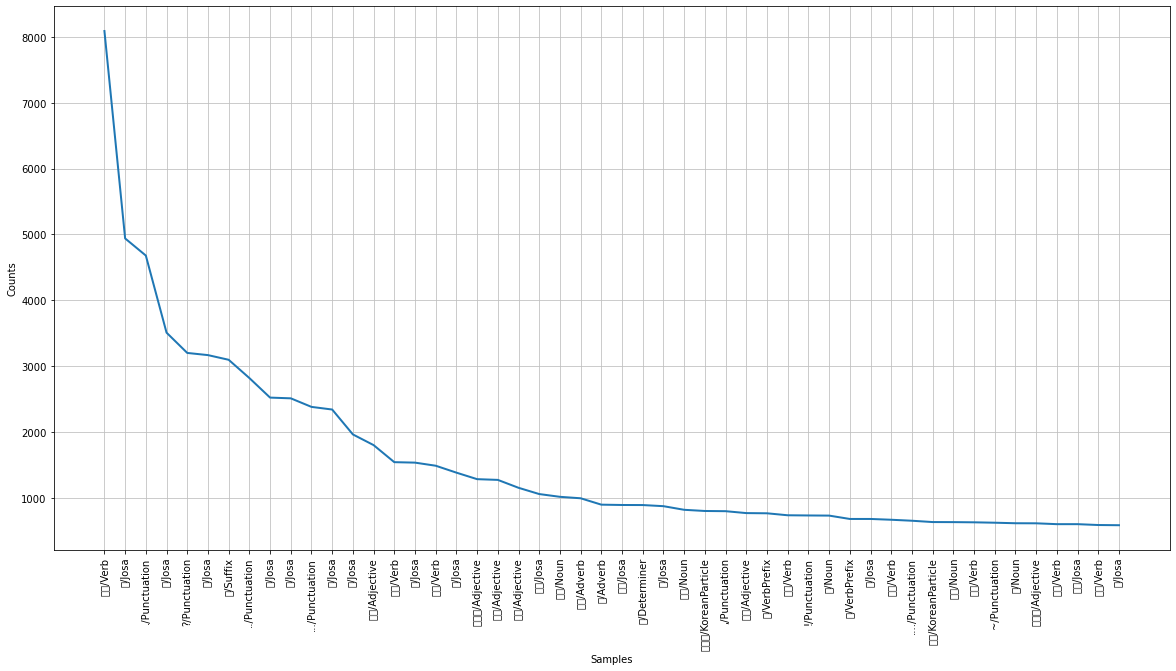

In [57]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.figure(figsize=(20,10))
anger_text.plot(50)

In [58]:
ANGER_FREQUENCY_COUNT = 1000;
anger_selected_words = [f[0] for f in anger_text.vocab().most_common(ANGER_FREQUENCY_COUNT)]

In [59]:
def anger_term_frequency(doc):
    return [doc.count(word) for word in anger_selected_words]

In [60]:
x_anger_train = [anger_term_frequency(d) for d,_ in train_anger_docs]
x_anger_test = [anger_term_frequency(d) for d,_ in test_anger_docs]
y_anger_train = [c for _,c in train_anger_docs]
y_anger_test = [c for _,c in test_anger_docs]

In [61]:
import numpy as np
x_anger_train = np.asarray(x_anger_train).astype('float32')
x_anger_test = np.asarray(x_anger_test). astype('float32')

y_anger_train = np.asarray(y_anger_train).astype('float32')
y_anger_test = np.asarray(y_anger_test).astype('float32')

In [62]:
import tensorflow as tf
anger_model= tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation = 'relu',input_shape=(ANGER_FREQUENCY_COUNT,)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [63]:
anger_model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
             loss=tf.keras.losses.binary_crossentropy,
             metrics=[tf.keras.metrics.binary_accuracy]
             )

In [64]:
anger_model.fit(x_anger_train, y_anger_train, epochs=50, batch_size=512)

Epoch 1/50
53/53 [==============================] - 0s 5ms/step - loss: 0.4383 - binary_accuracy: 0.8522
Epoch 2/50
53/53 [==============================] - 0s 6ms/step - loss: 0.3388 - binary_accuracy: 0.8572
Epoch 3/50
53/53 [==============================] - 0s 6ms/step - loss: 0.3147 - binary_accuracy: 0.8662
Epoch 4/50
53/53 [==============================] - 0s 6ms/step - loss: 0.3028 - binary_accuracy: 0.8706
Epoch 5/50
53/53 [==============================] - 0s 6ms/step - loss: 0.2931 - binary_accuracy: 0.8750
Epoch 6/50
53/53 [==============================] - 0s 6ms/step - loss: 0.2840 - binary_accuracy: 0.8802
Epoch 7/50
53/53 [==============================] - 0s 6ms/step - loss: 0.2746 - binary_accuracy: 0.8843
Epoch 8/50
53/53 [==============================] - 0s 6ms/step - loss: 0.2647 - binary_accuracy: 0.8901
Epoch 9/50
53/53 [==============================] - 0s 6ms/step - loss: 0.2546 - binary_accuracy: 0.8956
Epoch 10/50
53/53 [==============================] - 0s

In [65]:
anger_results = anger_model.evaluate(x_anger_test, y_anger_test)

362/362 [==============================] - 1s 2ms/step - loss: 1.7400 - binary_accuracy: 0.8234


In [66]:
anger_results

[1.739974021911621, 0.8233566284179688]

In [67]:
anger_model.save('anger_model.h5')

In [68]:
anger_review = "너무 화난다"
anger_token = tokenize(anger_review)
anger_token

['너무/Adverb', '화나다/Verb']

In [69]:
tf = anger_term_frequency(anger_token)
data = np.expand_dims(np.asarray(tf).astype('float32'),axis=0)
float(anger_model.predict(data))

0.0009709038422442973

In [70]:
def anger_predict(predict):
    anger_token = tokenize(predict)
    anger_tfq = anger_term_frequency(anger_token)
    anger_data = np.expand_dims(np.asarray(anger_tfq).astype('float32'), axis=0)
    anger_score = float(anger_model.predict(anger_data))
    if(anger_score > 0.5):
        print(f"{predict} ==> 분노 ({round(anger_score*100)}%)")
    else:
        print(f"{predict} ==> 분노X ({round((1-anger_score)*100)}%)")

In [71]:
anger_predict("분노")

분노 ==> 분노X (84%)


In [72]:
#슬픔 감정 분석

In [73]:
import pandas as pd
train_sadness_df = pd.read_csv("sadnesstrainalldata.txt","\t")
test_sadness_df = pd.read_csv("sadnesstestalldata.txt","\t")

In [74]:
from konlpy.tag import Okt
okt_sadness = Okt()

In [75]:
def tokenize(doc):
    return ['/'.join(t) for t in okt_sadness.pos(doc, norm=True, stem=True)]

In [76]:
train_sadness_df.isnull().any()
train_sadness_df['document'] = train_sadness_df['document'].fillna('');
train_sadness_df.isnull().any()
test_sadness_df['document'] = test_sadness_df['document'].fillna('');

In [77]:
train_sadness_docs = [(tokenize(row[1]), row[2]) for row in train_sadness_df.values]
test_sadness_docs = [(tokenize(row[1]),row[2]) for row in test_sadness_df.values]

In [78]:
print(train_sadness_docs[0])
print(test_sadness_docs[0])

(['언니/Noun', '동생/Noun', '으로/Josa', '부르다/Verb', '맞다/Verb', '일/Noun', '인가요/Josa', '..??/Punctuation'], 0)
(['톡/Noun', '크다/Verb', '언니/Noun', '들/Suffix', '임산부/Noun', '언니/Noun', '들/Suffix', 'ㅠㅠ/KoreanParticle'], 0)


In [79]:
tokens = [t for d in train_sadness_docs for t in d[0]]
print("토큰개수:",len(tokens))

토큰개수: 259374


In [80]:
import nltk
sadness_text = nltk.Text(tokens, name='NMSC')
print(len(sadness_text.tokens))
print(len(set(sadness_text.tokens)))
print(sadness_text.vocab().most_common(10))

259374
20799
[('하다/Verb', 8087), ('이/Josa', 4939), ('./Punctuation', 4679), ('가/Josa', 3509), ('?/Punctuation', 3201), ('에/Josa', 3168), ('들/Suffix', 3097), ('../Punctuation', 2820), ('을/Josa', 2523), ('은/Josa', 2512)]


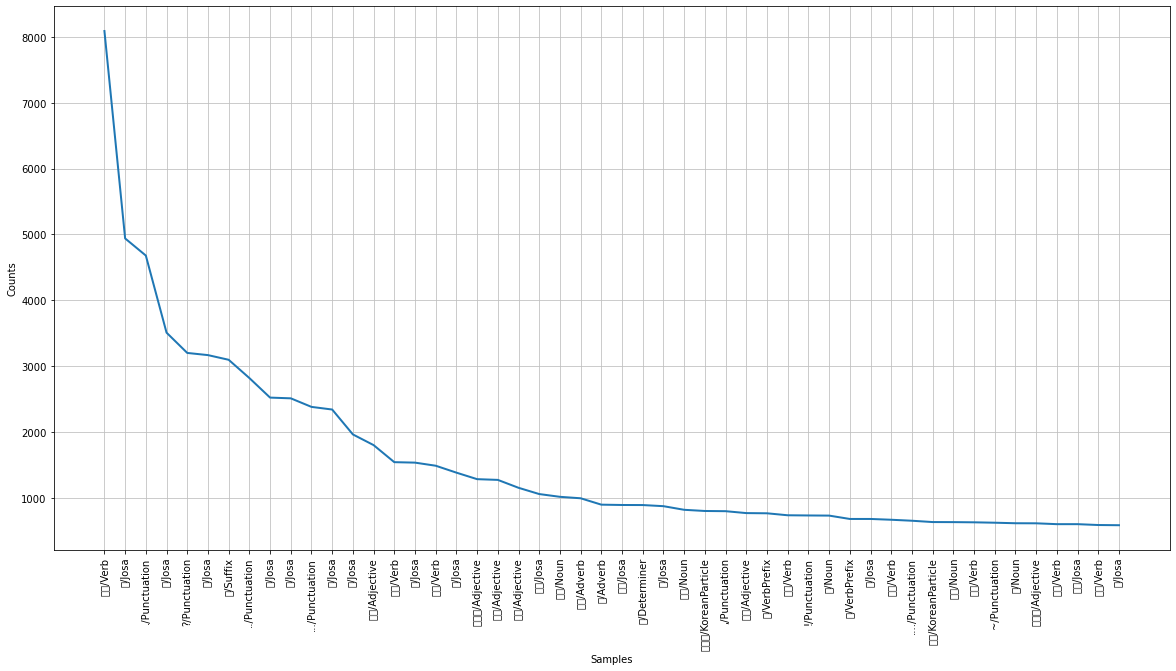

In [81]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.figure(figsize=(20,10))
sadness_text.plot(50)

In [82]:
SADNESS_FREQUENCY_COUNT = 1000;
sadness_selected_words = [f[0] for f in fear_text.vocab().most_common(SADNESS_FREQUENCY_COUNT)]

In [83]:
def sadness_term_frequency(doc):
    return [doc.count(word) for word in sadness_selected_words]

In [84]:
x_sadness_train = [sadness_term_frequency(d) for d,_ in train_sadness_docs]
x_sadness_test = [sadness_term_frequency(d) for d,_ in test_sadness_docs]
y_sadness_train = [c for _,c in train_sadness_docs]
y_sadness_test = [c for _,c in test_sadness_docs]

In [85]:
import numpy as np
x_sadness_train = np.asarray(x_sadness_train).astype('float32')
x_sadness_test = np.asarray(x_sadness_test). astype('float32')

y_sadness_train = np.asarray(y_sadness_train).astype('float32')
y_sadness_test = np.asarray(y_sadness_test).astype('float32')

In [86]:
import tensorflow as tf
sadness_model= tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation = 'relu',input_shape=(SADNESS_FREQUENCY_COUNT,)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [87]:
sadness_model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
             loss=tf.keras.losses.binary_crossentropy,
             metrics=[tf.keras.metrics.binary_accuracy]
             )

In [88]:
sadness_model.fit(x_sadness_train, y_sadness_train, epochs=50, batch_size=512)

Epoch 1/50
53/53 [==============================] - 0s 6ms/step - loss: 0.4178 - binary_accuracy: 0.8619
Epoch 2/50
53/53 [==============================] - 0s 4ms/step - loss: 0.2986 - binary_accuracy: 0.8811
Epoch 3/50
53/53 [==============================] - 0s 5ms/step - loss: 0.2647 - binary_accuracy: 0.8983
Epoch 4/50
53/53 [==============================] - 0s 6ms/step - loss: 0.2505 - binary_accuracy: 0.9038
Epoch 5/50
53/53 [==============================] - 0s 6ms/step - loss: 0.2408 - binary_accuracy: 0.9079
Epoch 6/50
53/53 [==============================] - 0s 6ms/step - loss: 0.2324 - binary_accuracy: 0.9104
Epoch 7/50
53/53 [==============================] - 0s 6ms/step - loss: 0.2233 - binary_accuracy: 0.9153
Epoch 8/50
53/53 [==============================] - 0s 6ms/step - loss: 0.2146 - binary_accuracy: 0.9191
Epoch 9/50
53/53 [==============================] - 0s 5ms/step - loss: 0.2052 - binary_accuracy: 0.9241
Epoch 10/50
53/53 [==============================] - 0s

In [89]:
sadness_results = sadness_model.evaluate(x_sadness_test, y_sadness_test)

362/362 [==============================] - 1s 3ms/step - loss: 1.2049 - binary_accuracy: 0.8540


In [90]:
sadness_results

[1.2048791646957397, 0.854020893573761]

In [91]:
sadness_model.save('sadness_model.h5')

In [92]:
sadness_review = "너무 화난다"
sadness_token = tokenize(sadness_review)
sadness_token

['너무/Adverb', '화나다/Verb']

In [93]:
tf = sadness_term_frequency(sadness_token)
data = np.expand_dims(np.asarray(tf).astype('float32'),axis=0)
float(sadness_model.predict(data))

0.5308104753494263

In [94]:
def sadness_predict(predict):
    sadness_token = tokenize(predict)
    sadness_tfq = sadness_term_frequency(sadness_token)
    sadness_data = np.expand_dims(np.asarray(sadness_tfq).astype('float32'), axis=0)
    sadness_score = float(sadness_model.predict(sadness_data))
    if(sadness_score > 0.5):
        print(f"{predict} ==> 슬픔 ({round(sadness_score*100)}%)")
    else:
        print(f"{predict} ==> 슬픔X ({round((1-sadness_score)*100)}%)")

In [95]:
sadness_predict(".")

. ==> 슬픔X (84%)


In [96]:
#중립 감정 분석

In [97]:
import pandas as pd
train_neutral_df = pd.read_csv("neutraltrainalldata.txt","\t")
test_neutral_df = pd.read_csv("neutraltestalldata.txt","\t")

In [98]:
from konlpy.tag import Okt
okt_neutral = Okt()

In [99]:
def tokenize(doc):
    return ['/'.join(t) for t in okt_neutral.pos(doc, norm=True, stem=True)]

In [100]:
train_neutral_docs = [(tokenize(row[1]), row[2]) for row in train_neutral_df.values]
test_neutral_docs = [(tokenize(row[1]),row[2]) for row in test_neutral_df.values]

In [101]:
print(train_neutral_docs[0])
print(test_neutral_docs[0])

(['언니/Noun', '동생/Noun', '으로/Josa', '부르다/Verb', '맞다/Verb', '일/Noun', '인가요/Josa', '..??/Punctuation'], 0)
(['톡/Noun', '크다/Verb', '언니/Noun', '들/Suffix', '임산부/Noun', '언니/Noun', '들/Suffix', 'ㅠㅠ/KoreanParticle'], 0)


In [102]:
tokens = [t for d in train_neutral_docs for t in d[0]]
print("토큰개수:",len(tokens))

토큰개수: 259374


In [103]:
import nltk
neutral_text = nltk.Text(tokens, name='NMSC')
print(len(neutral_text.tokens))
print(len(set(neutral_text.tokens)))
print(neutral_text.vocab().most_common(10))

259374
20799
[('하다/Verb', 8087), ('이/Josa', 4939), ('./Punctuation', 4679), ('가/Josa', 3509), ('?/Punctuation', 3201), ('에/Josa', 3168), ('들/Suffix', 3097), ('../Punctuation', 2820), ('을/Josa', 2523), ('은/Josa', 2512)]


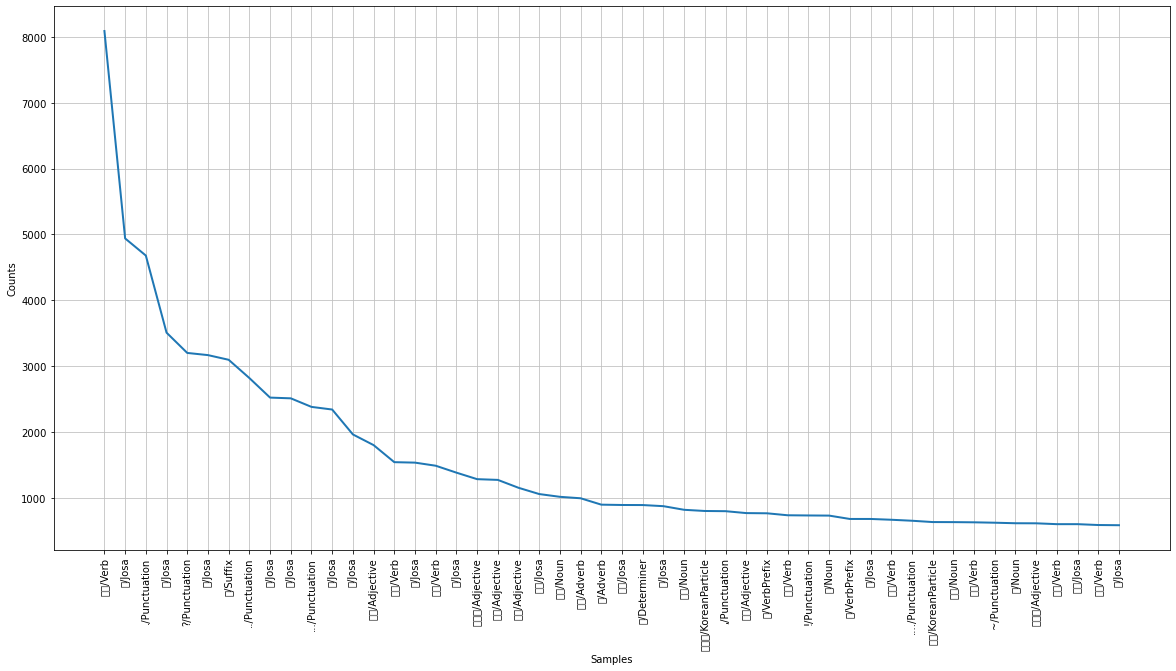

In [104]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.figure(figsize=(20,10))
neutral_text.plot(50)

In [105]:
NEUTRAL_FREQUENCY_COUNT = 1000;
neutral_selected_words = [f[0] for f in neutral_text.vocab().most_common(NEUTRAL_FREQUENCY_COUNT)]

In [106]:
def neutral_term_frequency(doc):
    return [doc.count(word) for word in neutral_selected_words]

In [107]:
x_neutral_train = [neutral_term_frequency(d) for d,_ in train_neutral_docs]
x_neutral_test = [neutral_term_frequency(d) for d,_ in test_neutral_docs]
y_neutral_train = [c for _,c in train_neutral_docs]
y_neutral_test = [c for _,c in test_neutral_docs]

In [108]:
import numpy as np
x_neutral_train = np.asarray(x_neutral_train).astype('float32')
x_neutral_test = np.asarray(x_neutral_test). astype('float32')

y_neutral_train = np.asarray(y_neutral_train).astype('float32')
y_neutral_test = np.asarray(y_neutral_test).astype('float32')

In [109]:
import tensorflow as tf
neutral_model= tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation = 'relu',input_shape=(NEUTRAL_FREQUENCY_COUNT,)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [110]:
neutral_model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
             loss=tf.keras.losses.binary_crossentropy,
             metrics=[tf.keras.metrics.binary_accuracy]
             )

In [111]:
neutral_model.fit(x_neutral_train, y_neutral_train, epochs=50, batch_size=512)

Epoch 1/50
53/53 [==============================] - 0s 3ms/step - loss: 0.4119 - binary_accuracy: 0.8744
Epoch 2/50
53/53 [==============================] - 0s 3ms/step - loss: 0.3402 - binary_accuracy: 0.8748
Epoch 3/50
53/53 [==============================] - 0s 3ms/step - loss: 0.3214 - binary_accuracy: 0.8752
Epoch 4/50
53/53 [==============================] - 0s 3ms/step - loss: 0.3109 - binary_accuracy: 0.8761
Epoch 5/50
53/53 [==============================] - 0s 3ms/step - loss: 0.3013 - binary_accuracy: 0.8780
Epoch 6/50
53/53 [==============================] - 0s 3ms/step - loss: 0.2925 - binary_accuracy: 0.8809
Epoch 7/50
53/53 [==============================] - 0s 3ms/step - loss: 0.2828 - binary_accuracy: 0.8855
Epoch 8/50
53/53 [==============================] - 0s 3ms/step - loss: 0.2725 - binary_accuracy: 0.8906
Epoch 9/50
53/53 [==============================] - 0s 3ms/step - loss: 0.2611 - binary_accuracy: 0.8956
Epoch 10/50
53/53 [==============================] - 0s

In [112]:
neutral_results = neutral_model.evaluate(x_neutral_test, y_neutral_test)

362/362 [==============================] - 0s 623us/step - loss: 1.4923 - binary_accuracy: 0.8247


In [113]:
neutral_results

[1.4922765493392944, 0.8246523141860962]

In [114]:
neutral_model.save('neutral_model.h5')

In [115]:
neutral_review = "너무 화난다"
neutral_token = tokenize(neutral_review)
neutral_token

['너무/Adverb', '화나다/Verb']

In [116]:
tf = neutral_term_frequency(neutral_token)
data = np.expand_dims(np.asarray(tf).astype('float32'),axis=0)
float(neutral_model.predict(data))

0.0010692873038351536

In [117]:
def neutral_predict(predict):
    neutral_token = tokenize(predict)
    neutral_tfq = neutral_term_frequency(neutral_token)
    neutral_data = np.expand_dims(np.asarray(neutral_tfq).astype('float32'), axis=0)
    neutral_score = float(neutral_model.predict(neutral_data))
    if(neutral_score > 0.5):
        print(f"{predict} ==> 중립 ({round(neutral_score*100)}%)")
    else:
        print(f"{predict} ==> 중립X ({round((1-neutral_score)*100)}%)")

In [118]:
neutral_predict("안녕")

안녕 ==> 중립X (83%)


In [119]:
#행복 감정 분석

In [120]:
import pandas as pd
train_happy_df = pd.read_csv("happytrainalldata.txt","\t")
test_happy_df = pd.read_csv("happytestalldata.txt","\t")

In [121]:
from konlpy.tag import Okt
okt_happy = Okt()

In [122]:
def tokenize(doc):
    return ['/'.join(t) for t in okt_happy.pos(doc, norm=True, stem=True)]

In [123]:
train_happy_docs = [(tokenize(row[1]), row[2]) for row in train_happy_df.values]
test_happy_docs = [(tokenize(row[1]),row[2]) for row in test_happy_df.values]

In [124]:
print(train_happy_docs[0])
print(test_happy_docs[0])

(['언니/Noun', '동생/Noun', '으로/Josa', '부르다/Verb', '맞다/Verb', '일/Noun', '인가요/Josa', '..??/Punctuation'], 0)
(['톡/Noun', '크다/Verb', '언니/Noun', '들/Suffix', '임산부/Noun', '언니/Noun', '들/Suffix', 'ㅠㅠ/KoreanParticle'], 0)


In [125]:
tokens = [t for d in train_happy_docs for t in d[0]]
print("토큰개수:",len(tokens))

토큰개수: 259374


In [126]:
import nltk
happy_text = nltk.Text(tokens, name='NMSC')
print(len(happy_text.tokens))
print(len(set(happy_text.tokens)))
print(happy_text.vocab().most_common(10))

259374
20799
[('하다/Verb', 8087), ('이/Josa', 4939), ('./Punctuation', 4679), ('가/Josa', 3509), ('?/Punctuation', 3201), ('에/Josa', 3168), ('들/Suffix', 3097), ('../Punctuation', 2820), ('을/Josa', 2523), ('은/Josa', 2512)]


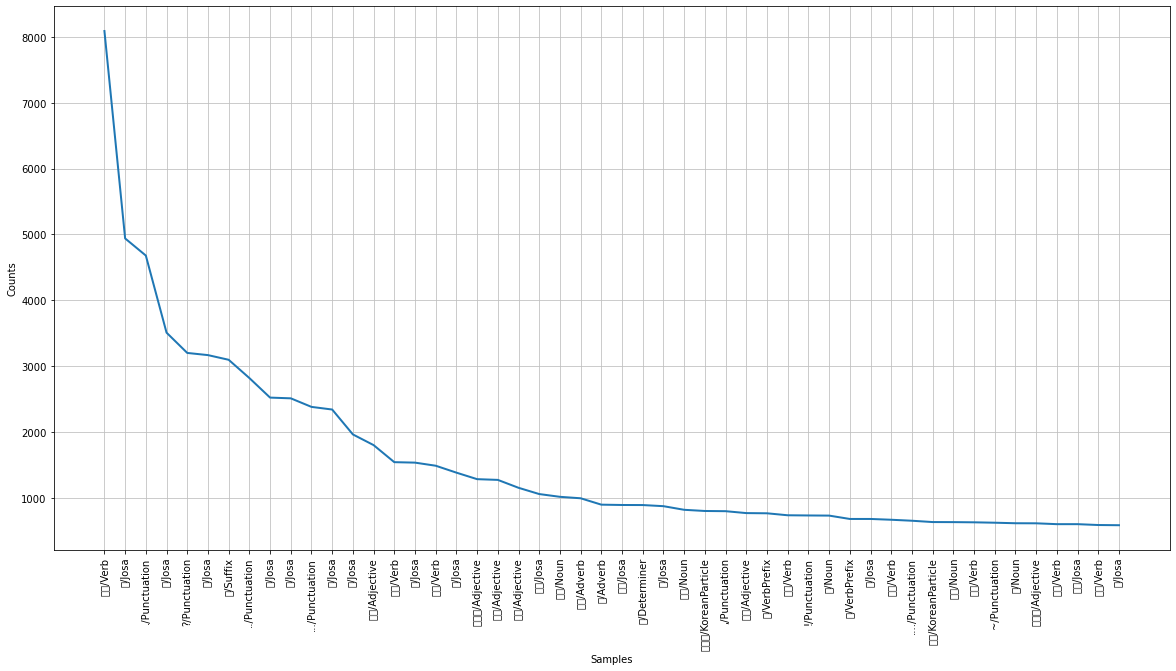

In [127]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.figure(figsize=(20,10))
happy_text.plot(50)

In [128]:
HAPPY_FREQUENCY_COUNT = 1000;
happy_selected_words = [f[0] for f in happy_text.vocab().most_common(HAPPY_FREQUENCY_COUNT)]

In [129]:
def happy_term_frequency(doc):
    return [doc.count(word) for word in happy_selected_words]

In [130]:
x_happy_train = [happy_term_frequency(d) for d,_ in train_happy_docs]
x_happy_test = [happy_term_frequency(d) for d,_ in test_happy_docs]
y_happy_train = [c for _,c in train_happy_docs]
y_happy_test = [c for _,c in test_happy_docs]

In [131]:
import numpy as np
x_happy_train = np.asarray(x_happy_train).astype('float32')
x_happy_test = np.asarray(x_happy_test). astype('float32')

y_happy_train = np.asarray(y_happy_train).astype('float32')
y_happy_test = np.asarray(y_happy_test).astype('float32')

In [132]:
import tensorflow as tf
happy_model= tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation = 'relu',input_shape=(HAPPY_FREQUENCY_COUNT,)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [133]:
happy_model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
             loss=tf.keras.losses.binary_crossentropy,
             metrics=[tf.keras.metrics.binary_accuracy]
             )

In [134]:
happy_model.fit(x_happy_train, y_happy_train, epochs=50, batch_size=512)

Epoch 1/50
53/53 [==============================] - 0s 3ms/step - loss: 0.3893 - binary_accuracy: 0.8502
Epoch 2/50
53/53 [==============================] - 0s 3ms/step - loss: 0.2431 - binary_accuracy: 0.9133
Epoch 3/50
53/53 [==============================] - 0s 3ms/step - loss: 0.2079 - binary_accuracy: 0.9236
Epoch 4/50
53/53 [==============================] - 0s 3ms/step - loss: 0.1952 - binary_accuracy: 0.9262
Epoch 5/50
53/53 [==============================] - 0s 3ms/step - loss: 0.1873 - binary_accuracy: 0.9291
Epoch 6/50
53/53 [==============================] - 0s 3ms/step - loss: 0.1802 - binary_accuracy: 0.9313
Epoch 7/50
53/53 [==============================] - 0s 4ms/step - loss: 0.1746 - binary_accuracy: 0.9330
Epoch 8/50
53/53 [==============================] - 0s 3ms/step - loss: 0.1686 - binary_accuracy: 0.9363
Epoch 9/50
53/53 [==============================] - 0s 3ms/step - loss: 0.1626 - binary_accuracy: 0.9390
Epoch 10/50
53/53 [==============================] - 0s

In [135]:
happy_results = happy_model.evaluate(x_happy_test, y_happy_test)

362/362 [==============================] - 0s 565us/step - loss: 1.3025 - binary_accuracy: 0.8778


In [136]:
happy_results

[1.3025274276733398, 0.8777748942375183]

In [137]:
happy_model.save('happy_model.h5')

In [138]:
happy_review = "너무 화난다"
happy_token = tokenize(happy_review)
happy_token

['너무/Adverb', '화나다/Verb']

In [139]:
tf = happy_term_frequency(happy_token)
data = np.expand_dims(np.asarray(tf).astype('float32'),axis=0)
float(happy_model.predict(data))

0.09146510809659958

In [140]:
def happy_predict(predict):
    happy_token = tokenize(predict)
    happy_tfq = happy_term_frequency(happy_token)
    happy_data = np.expand_dims(np.asarray(happy_tfq).astype('float32'), axis=0)
    happy_score = float(happy_model.predict(happy_data))
    if(happy_score > 0.5):
        print(f"{predict} ==> 행복 ({round(happy_score*100)}%)")
    else:
        print(f"{predict} ==> 행복X ({round((1-happy_score)*100)}%)")

In [141]:
happy_predict("너무해")

너무해 ==> 행복X (87%)


In [142]:
#혐오 감정 분석

In [143]:
import pandas as pd
train_disgust_df = pd.read_csv("disgusttrainalldata.txt","\t")
test_disgust_df = pd.read_csv("disgusttestalldata.txt","\t")

In [144]:
from konlpy.tag import Okt
okt_disgust = Okt()

In [145]:
def tokenize(doc):
    return ['/'.join(t) for t in okt_disgust.pos(doc, norm=True, stem=True)]

In [146]:
train_disgust_docs = [(tokenize(row[1]), row[2]) for row in train_disgust_df.values]
test_disgust_docs = [(tokenize(row[1]),row[2]) for row in test_disgust_df.values]

In [147]:
print(train_disgust_docs[0])
print(test_disgust_docs[0])

(['언니/Noun', '동생/Noun', '으로/Josa', '부르다/Verb', '맞다/Verb', '일/Noun', '인가요/Josa', '..??/Punctuation'], 0)
(['톡/Noun', '크다/Verb', '언니/Noun', '들/Suffix', '임산부/Noun', '언니/Noun', '들/Suffix', 'ㅠㅠ/KoreanParticle'], 0)


In [148]:
tokens = [t for d in train_disgust_docs for t in d[0]]
print("토큰개수:",len(tokens))

토큰개수: 259374


In [149]:
import nltk
disgust_text = nltk.Text(tokens, name='NMSC')
print(len(disgust_text.tokens))
print(len(set(disgust_text.tokens)))
print(disgust_text.vocab().most_common(10))

259374
20799
[('하다/Verb', 8087), ('이/Josa', 4939), ('./Punctuation', 4679), ('가/Josa', 3509), ('?/Punctuation', 3201), ('에/Josa', 3168), ('들/Suffix', 3097), ('../Punctuation', 2820), ('을/Josa', 2523), ('은/Josa', 2512)]


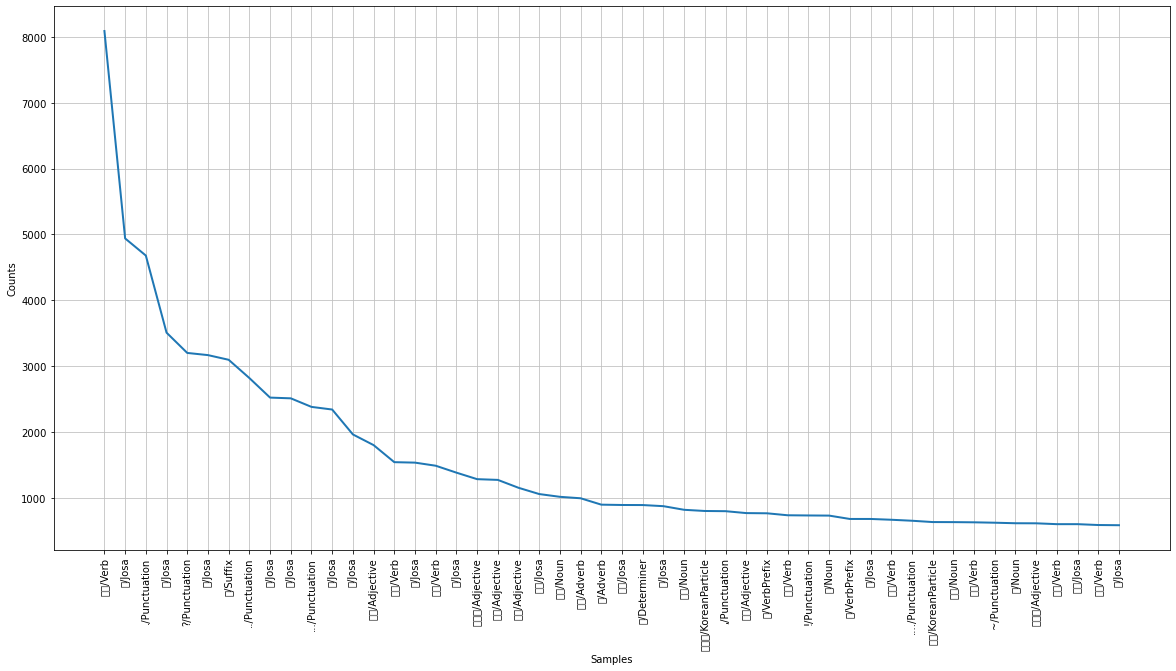

In [150]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.figure(figsize=(20,10))
disgust_text.plot(50)

In [151]:
DISGUST_FREQUENCY_COUNT = 1000;
disgust_selected_words = [f[0] for f in disgust_text.vocab().most_common(DISGUST_FREQUENCY_COUNT)]

In [152]:
def disgust_term_frequency(doc):
    return [doc.count(word) for word in disgust_selected_words]

In [153]:
x_disgust_train = [disgust_term_frequency(d) for d,_ in train_disgust_docs]
x_disgust_test = [disgust_term_frequency(d) for d,_ in test_disgust_docs]
y_disgust_train = [c for _,c in train_disgust_docs]
y_disgust_test = [c for _,c in test_disgust_docs]

In [154]:
import numpy as np
x_disgust_train = np.asarray(x_disgust_train).astype('float32')
x_disgust_test = np.asarray(x_disgust_test). astype('float32')

y_disgust_train = np.asarray(y_disgust_train).astype('float32')
y_disgust_test = np.asarray(y_disgust_test).astype('float32')

In [155]:
import tensorflow as tf
disgust_model= tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation = 'relu',input_shape=(DISGUST_FREQUENCY_COUNT,)),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [156]:
disgust_model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
             loss=tf.keras.losses.binary_crossentropy,
             metrics=[tf.keras.metrics.binary_accuracy]
             )

In [157]:
disgust_model.fit(x_disgust_train, y_disgust_train, epochs=50, batch_size=512)

Epoch 1/50
53/53 [==============================] - 0s 4ms/step - loss: 0.4410 - binary_accuracy: 0.8589
Epoch 2/50
53/53 [==============================] - 0s 4ms/step - loss: 0.3637 - binary_accuracy: 0.8594
Epoch 3/50
53/53 [==============================] - 0s 4ms/step - loss: 0.3416 - binary_accuracy: 0.8604
Epoch 4/50
53/53 [==============================] - 0s 4ms/step - loss: 0.3287 - binary_accuracy: 0.8634
Epoch 5/50
53/53 [==============================] - 0s 4ms/step - loss: 0.3175 - binary_accuracy: 0.8669
Epoch 6/50
53/53 [==============================] - 0s 4ms/step - loss: 0.3069 - binary_accuracy: 0.8709
Epoch 7/50
53/53 [==============================] - 0s 4ms/step - loss: 0.2951 - binary_accuracy: 0.8770
Epoch 8/50
53/53 [==============================] - 0s 4ms/step - loss: 0.2835 - binary_accuracy: 0.8838
Epoch 9/50
53/53 [==============================] - 0s 4ms/step - loss: 0.2703 - binary_accuracy: 0.8899
Epoch 10/50
53/53 [==============================] - 0s

In [158]:
disgust_results = neutral_model.evaluate(x_disgust_test, y_disgust_test)

362/362 [==============================] - 0s 780us/step - loss: 2.5249 - binary_accuracy: 0.7917


In [159]:
disgust_results

[2.5248987674713135, 0.7916558980941772]

In [160]:
disgust_model.save('disgust_model.h5')

In [161]:
disgust_review = "너무 화난다"
disgust_token = tokenize(disgust_review)
disgust_token

['너무/Adverb', '화나다/Verb']

In [162]:
tf = disgust_term_frequency(disgust_token)
data = np.expand_dims(np.asarray(tf).astype('float32'),axis=0)
float(disgust_model.predict(data))

0.001784318359568715

In [163]:
def disgust_predict(predict):
    disgust_token = tokenize(predict)
    disgust_tfq = disgust_term_frequency(disgust_token)
    disgust_data = np.expand_dims(np.asarray(disgust_tfq).astype('float32'), axis=0)
    disgust_score = float(disgust_model.predict(disgust_data))
    if(disgust_score > 0.5):
        print(f"{predict} ==> 혐오 ({round(disgust_score*100)}%)")
    else:
        print(f"{predict} ==> 혐오X ({round((1-disgust_score)*100)}%)")

In [164]:
disgust_predict("원재상")

원재상 ==> 혐오X (88%)


In [165]:
def predict(predict):
    fear_predict(predict)
    disgust_predict(predict)
    sadness_predict(predict)
    happy_predict(predict)
    anger_predict(predict)
    #neutral_predict(predict)
    surprise_predict(predict)

In [173]:
predict("군대놀이가 그렇게 하고 싶으면 군대를 가 ㅋㅋㅋ")

군대놀이가 그렇게 하고 싶으면 군대를 가 ㅋㅋㅋ ==> 공포X (100%)
군대놀이가 그렇게 하고 싶으면 군대를 가 ㅋㅋㅋ ==> 혐오X (100%)
군대놀이가 그렇게 하고 싶으면 군대를 가 ㅋㅋㅋ ==> 슬픔X (100%)
군대놀이가 그렇게 하고 싶으면 군대를 가 ㅋㅋㅋ ==> 행복X (100%)
군대놀이가 그렇게 하고 싶으면 군대를 가 ㅋㅋㅋ ==> 분노 (56%)
군대놀이가 그렇게 하고 싶으면 군대를 가 ㅋㅋㅋ ==> 놀람X (100%)
